# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [6]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [5]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

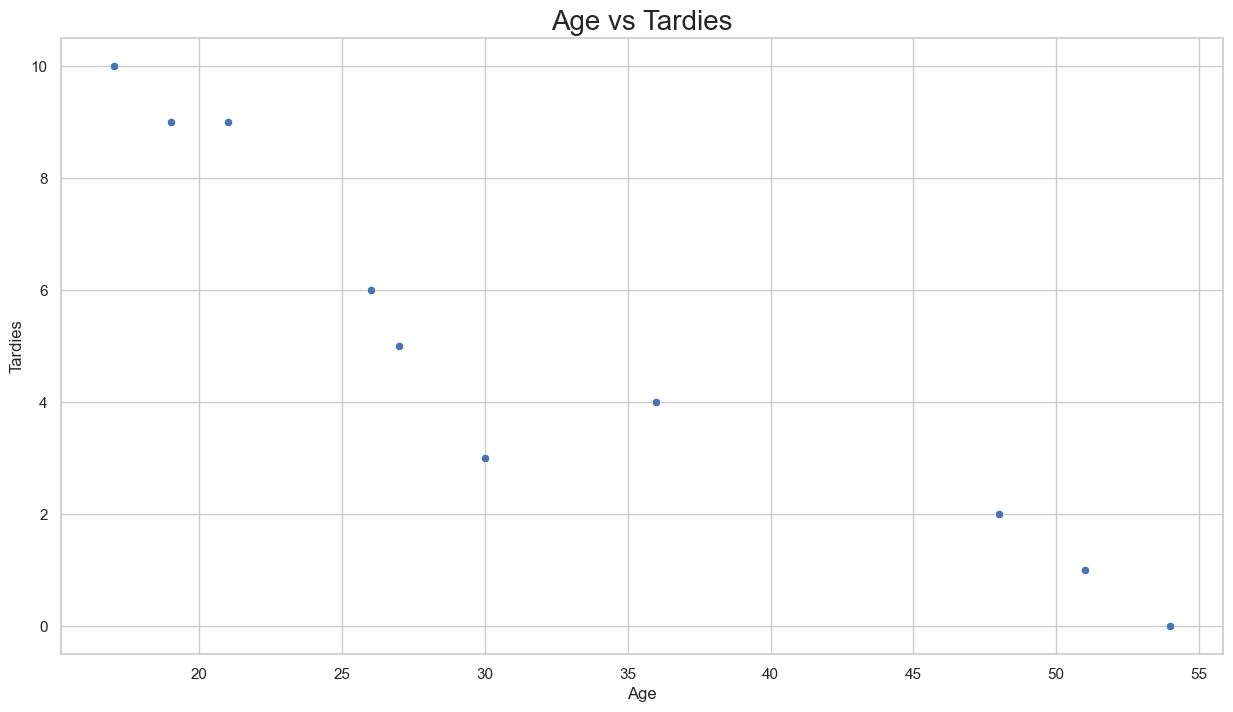

In [8]:
sns.scatterplot(y = student_data.Tardies, x=student_data.Age)
plt.title("Age vs Tardies", size=20);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# We can see that there is a negative correlation, negative correlation between this two variables means that:
# As the values of variable age get bigger the values of the variable Tardies decrease

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
covariance = student_data['Age'].cov(student_data['Tardies'])
print(f"The covariance result is: {covariance}")
correlation = student_data['Age'].corr(student_data['Tardies'])
print(f"The correlation result is: {correlation}")




The covariance result is: -45.56666666666666
The correlation result is: -0.9391626886887122


In [ ]:
"""
The difference is that the covariance gives us the direction (positive or negative) between the variables and the correlation gives us the direction
and the strenght of it, with a value between -1 and 1.

In this case we can se that there is a negative covariance and correlation is also negative. Meaning that the direction will be desdending from left to right and that the
variables are strongly negative correlated.

"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [18]:
lr = LinearRegression() # 1. Create an equation that draws a line

X = student_data[["Age"]]
y = student_data.Tardies

lr.fit(X, y) 

LinearRegression()

In [34]:
lr.coef_


array([-0.24282077])

In [33]:
lr.intercept_

12.888803363135771

In [29]:
def age_and_tardies (age):
    return lr.coef_[0] * age +  lr.intercept_
age_and_tardies (2)

In [30]:
"""
1 --> The outcome variable is the Tardies or minutes late that a person of a certain age is

2 --> I used the simple regression model, as I saw that there was a linear relationship between the predictor and the target variable

"""

12.40316182130381

Plot your regression model on your scatter plot.

In [31]:
student_data["prediction_through_scikit_learn"] = student_data.Age * lr.coef_[0] + lr.intercept_

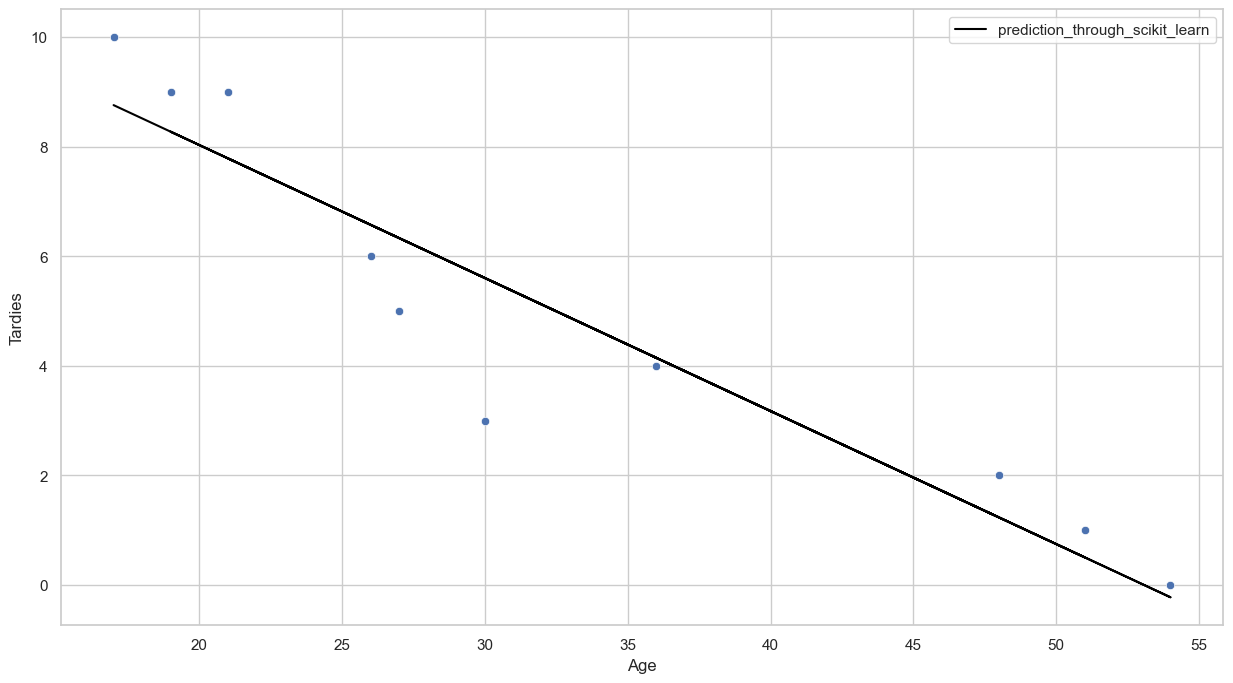

In [32]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)
plt.plot(student_data.Age, student_data["prediction_through_scikit_learn"], c="black", label="prediction_through_scikit_learn")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
"""
Based on the data and the model we can confirm that the age is a good predictor of tardiness, the data shows how as people get older tend to be 
less late. 

"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [37]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [42]:
# y = co2
# x = everything else

vehicles.columns = vehicles.columns.str.replace(" ","_")
vehicles.columns = vehicles.columns.str.replace("/","_")
vehicles.head()

,Make,Model,Year,Engine_Displacement,Cylinders,Transmission,Drivetrain,Vehicle_Class,Fuel_Type,Fuel_Barrels_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [48]:
vehicles[["CO2_Emission_Grams_Mile", "Year", "Cylinders",  "Fuel_Barrels_Year" , "Combined_MPG", "Fuel_Cost_Year"]].corr()

,CO2_Emission_Grams_Mile,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,Fuel_Cost_Year
CO2_Emission_Grams_Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel_Barrels_Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined_MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel_Cost_Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [ ]:
"""
Most important variable: 

    - The most imprtant variable to determine the CO2 emisions is Fuel Barrels / Year with a 0.986189 correlation.

Least amount of helpful information:

    - The variable that will give us less meaningful information is Year, mening that there isn't a high correlation or influence between the year that it is and the
        CO2 emissions.

"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [50]:
# 1. X, y: 
X = vehicles[["Year", "Cylinders",  "Fuel_Barrels_Year" , "Combined_MPG", "Fuel_Cost_Year"]]
y = vehicles.CO2_Emission_Grams_Mile

# 2. Choose a model: lr
lr = LinearRegression() # Instantiating the model -> draw a straight line

# 3. Fit
lr.fit(X, y) # Draw the straight line based on this data

# 4. Metrics
lr.intercept_ # 9.945632841045317
lr.coef_ # [ 0.08185069, -0.03095235]

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

In [53]:

# 2. Choose a model: lr & fit
result = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data = vehicles).fit()

# 3. Metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                             16:48:34   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
"""
Among these variables:

    - "Fuel_Barrels_Year" has the highest coefficient of 19.0529, suggesting it has the most significant impact on CO2 emissions per unit change.

    - "Combined_MPG" has a negative coefficient, indicating that as fuel efficiency (miles per gallon) increases, CO2 emissions decrease.

    - The p-values (P>|t|) for all coefficients are very low (close to 0), indicating statistical significance for all variables in predicting CO2 emissions.

    - The model suggests that the most important variables influencing CO2 emissions are "Fuel_Barrels_Year," "Combined_MPG," and "Cylinders." However, it's essential to remember that correlation doesn't imply causation. Although these variables show strong relationships with CO2 emissions, further analysis is required to establish causality.

    - Additionally, the high R-squared value indicates a good fit.

"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [55]:
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

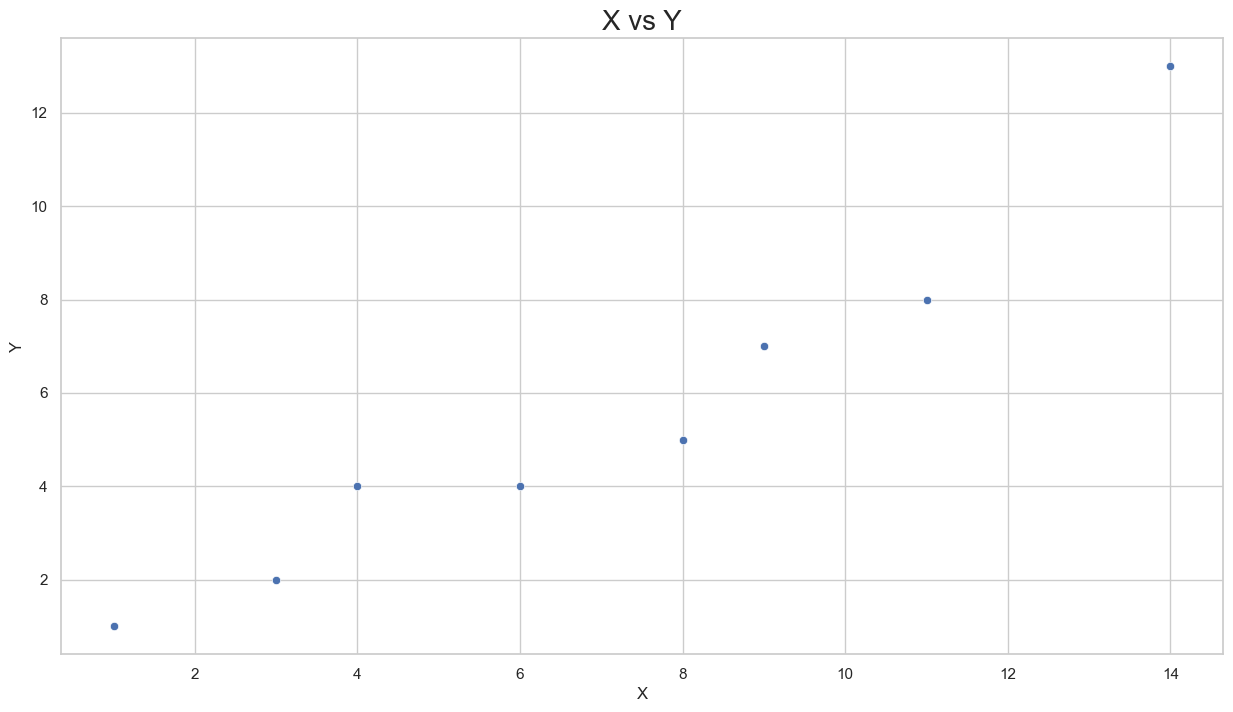

In [56]:
sns.scatterplot(y = df.Y, x=df.X)
plt.title("X vs Y", size=20);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [59]:
correlation = df['X'].corr(df['Y'])
print(f"The correlation result is: {correlation}")

The correlation result is: 0.9652303546573691


In [2]:
"""
We can see a positive correlation of 0.9652303546573691 meaning that whenever the value of X increases also increases the value of Y

"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<Axes: ylabel='Y'>

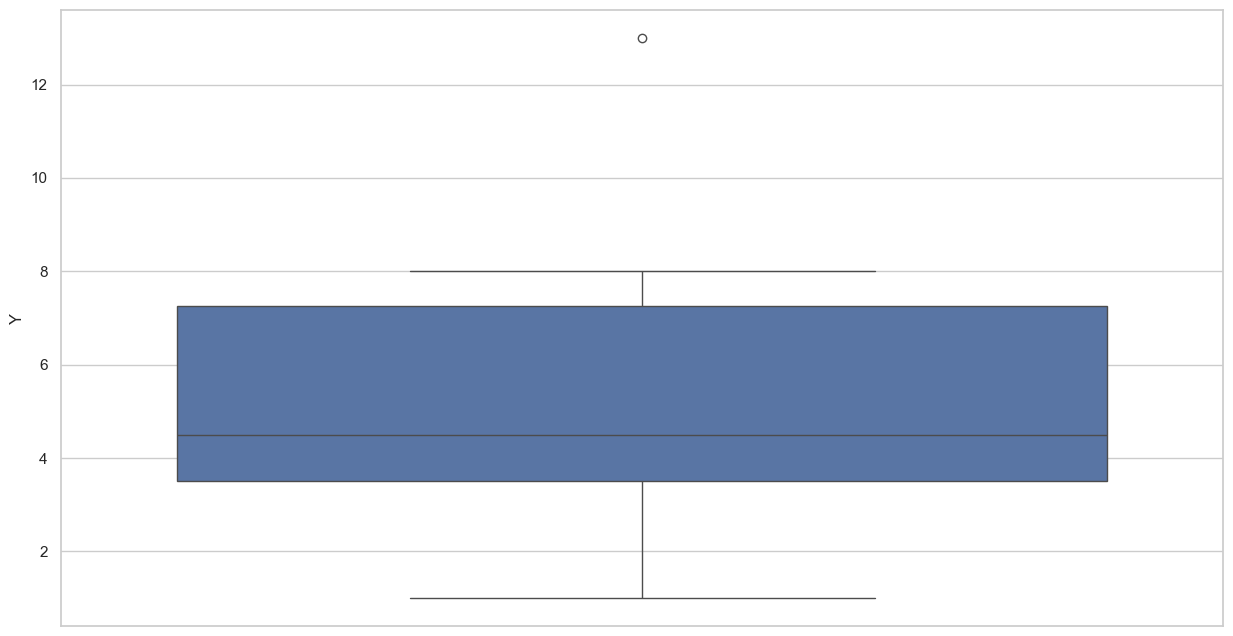

In [61]:
sns.boxplot(df.Y)

In [ ]:
# We can see that there is an outlier on the last value of the dataframe

In [62]:
new_df = pd.DataFrame({'X': [1,3,4,6,8,9,11], 'Y': [1,2,4,4,5,7,8]})

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

The correlation result is: 0.9712781168250859


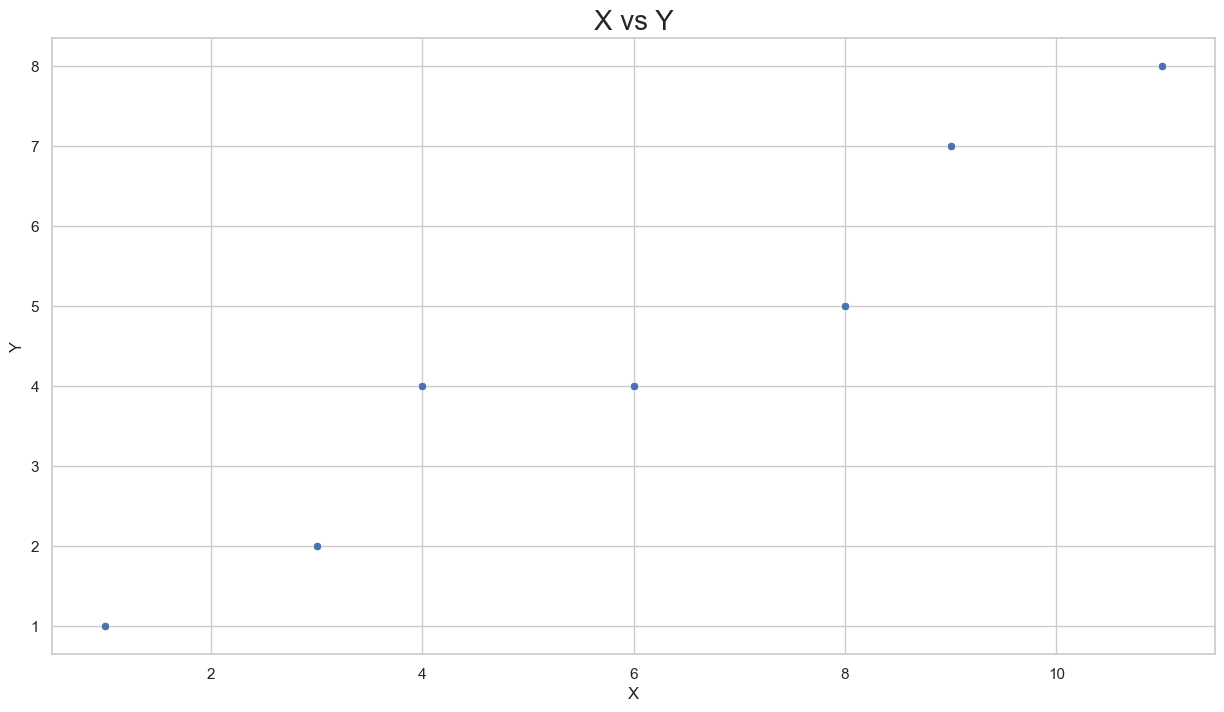

In [64]:
correlation = new_df['X'].corr(new_df['Y'])
print(f"The correlation result is: {correlation}")
sns.scatterplot(y = new_df.Y, x=new_df.X)
plt.title("X vs Y", size=20);

In [ ]:
# The correlation is higher in the second df, the new correlation is 0.9712781168250859